In [6]:
# Dependencies
import config
import os
import tweepy
import numpy as np
import pandas as pd
import datetime as datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [7]:
# Twitter accounts that we are going to analyze
target_user = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@nytimes")

# List for holding sentiments
sentiments = []


In [8]:
#Loop through each target user

for user in target_user:
    
    #Initialize the counter variable
    counter = 1
    
    # Variable for max_id
    oldest_tweet = None
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed using Tweepy
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:
            
            tweet_text = tweet["text"]
               
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            
            tweet_date = tweet["created_at"]
            
            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1
        
            #Add sentiments for each tweet into a list
            sentiments.append({"Username": user,
                               "Date": tweet_date, 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter,
                               "Tweet": tweet_text})
            
            
    
            #Add to counter 
            counter += 1
            
           
print(f"Finished getting results from Twitter.")
    
    

Finished getting results from Twitter.


In [10]:
# Create DataFrame from Results List
results_df = pd.DataFrame.from_dict(sentiments).set_index('Username').round(3)
results_df.head(20)

,Compound,Date,Negative,Neutral,Positive,Tweet,Tweets Ago
Username,,,,,,,
@BBC,0.000,Tue Oct 02 19:02:07 +0000 2018,1.000,0.000,0.000,Discover the extraordinary story of how a smal...,1
@BBC,-0.802,Tue Oct 02 17:55:03 +0000 2018,0.573,0.427,0.000,Knife crime is up 22%. Who are the victims and...,2
@BBC,0.402,Tue Oct 02 17:06:06 +0000 2018,0.803,0.000,0.197,The gender reveal party that sparked a massive...,3
@BBC,0.557,Tue Oct 02 16:06:02 +0000 2018,0.816,0.000,0.184,"In 2002, Iberian Lynx were the rarest cats in ...",4
@BBC,-0.273,Tue Oct 02 14:06:04 +0000 2018,0.554,0.242,0.204,Two scientists who discovered how to fight can...,5
@BBC,0.599,Tue Oct 02 13:05:03 +0000 2018,0.795,0.000,0.205,"🍲😋 A bowl of warm, hearty stew is always a wel...",6
@BBC,0.000,Tue Oct 02 12:05:04 +0000 2018,1.000,0.000,0.000,Jodie Whittaker. New Doctor...and a 'Shat Lass...,7
@BBC,0.572,Tue Oct 02 10:47:27 +0000 2018,0.829,0.000,0.171,Donna Strickland has become the first woman to...,8
@BBC,0.000,Tue Oct 02 10:27:17 +0000 2018,1.000,0.000,0.000,RT @BBCSport: SPOTY is back - and there are so...,9


<Figure size 432x288 with 0 Axes>

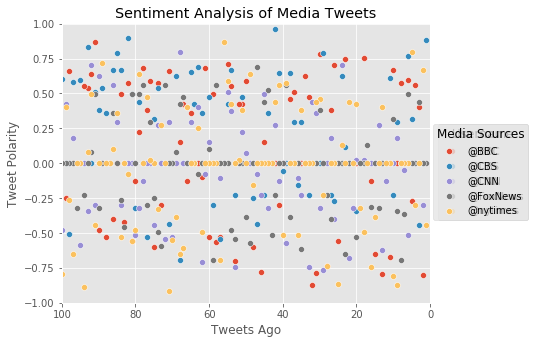

In [13]:
#Now place all of the compound scores for the media outlets on one plot

plt.clf()

#Put the username field back into the dataframe so we can use it in the plot
results_df_flat = results_df.reset_index()

grid = sns.pairplot(x_vars=["Tweets Ago"], y_vars=["Compound"], data=results_df_flat, hue="Username", size=5)

grid.add_legend(title="Media Sources")

plt.ylabel("Tweet Polarity")
plt.ylim([-1.0,1.0]) 
plt.xlim([100, 0])

plt.subplots_adjust(top=0.9)
plt.title("Sentiment Analysis of Media Tweets")

 #Save the figure
plotstring = "Images/Media Tweet Sentiment Plot.jpg"
plt.savefig(plotstring, dpi=150)


In [14]:
#Function for plotting the Twitter sentiment results for each individual media outlet
def sentiment_plot(username):
    
    plt.clf()
    
    x_vals = results_df.loc[username, "Tweets Ago"]
    y_vals = results_df.loc[username, "Compound"]
    plt.plot(x_vals, y_vals, marker="o", linewidth=0.5, alpha=0.8)

    fig = plt.figure(1)
    ax = fig.add_subplot(111)    
    
    # # Incorporate the other graph properties
    now = datetime.datetime.now()
    asofdate = now.strftime("%m/%d/%y")
    plt.title(f"Sentiment Analysis of Tweets As Of {asofdate}")
    plt.ylim([-1.0,1.0]) 
    plt.xlim([100, 0])
    plt.ylabel("Tweet Polarity")
    plt.xlabel("Tweets Ago")
    legend = ax.legend({username}, title="Tweets", shadow=True)
   
   #Save the figure
    figname=f"Images/Tweet Analysis for {username}.png"
    plt.savefig(fname=figname, bbox_extra_artists=(legend), dpi=150)

    

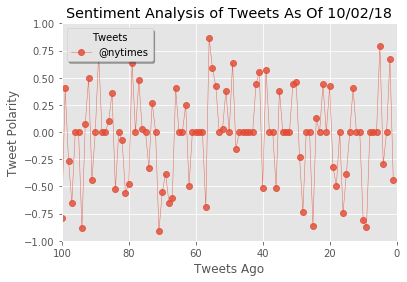

In [15]:
#Call the sentiment plotting function for each news organization
# to get a separate plot for each one.

for name in target_user:
    sentiment_plot(name)



In [17]:
#Aggregate the overall sentiments last 100 tweets for each news organization 

#Group the dataframe by username and calculate the mean of the compound scores
score_groupby = results_df.groupby(['Username']).mean()
                                               
score_groupby.head()


,Compound,Negative,Neutral,Positive,Tweets Ago
Username,,,,,
@BBC,0.06074,0.82882,0.07401,0.09715,50.5
@CBS,0.15246,0.87420,0.03318,0.09263,50.5
@CNN,-0.03055,0.88946,0.06106,0.04947,50.5
@FoxNews,-0.02653,0.88032,0.06571,0.05397,50.5
@nytimes,-0.03785,0.87567,0.07123,0.05308,50.5


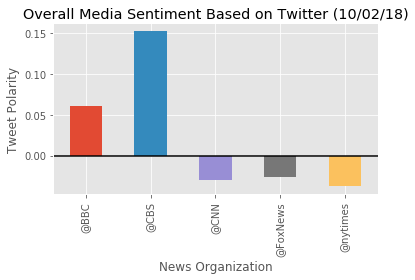

In [18]:
#Create a bar plot for the Compound score of each news organization

#Put the groupby into a regular dataframe by resetting the index

compound_score_df = score_groupby.reset_index()
compound_score_df

#Get the M/D/Y format for plot title
now = datetime.datetime.now()
asofdate = now.strftime("%m/%d/%y")

#Create the bar plot

plt.figure()

ax2 = score_groupby['Compound'].plot.bar(title=f"Overall Media Sentiment Based on Twitter ({asofdate})")
                                        
ax2.set_ylabel("Tweet Polarity")
ax2.set_xlabel("News Organization")

plt.axhline(0, color='k')

#Save the figure

plt.tight_layout()
figname=f"Images/Overall Twitter Media Sentiment Bar Chart.png"
plt.savefig(fname=figname, dpi=150)


